**MLFLOW**

In [1]:
!pip install mlflow
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packa

In [3]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import subprocess
from pyngrok import ngrok, conf
import getpass
from datetime import datetime

**MLFLOW UI BACKEND**

In [4]:
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

CREATE AN EXPERIMENT NAME

In [5]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
# mlflow will create an experiment if it doesn't exist
experiment_name = "landuse-classification-experiment"
run_name = datetime.now().strftime("%Y%m%d_%H%M%S")

**GET PASS CODE**

In [ ]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com
··········
 * ngrok tunnel "https://5a9e-34-75-227-131.ngrok-free.app" -> "http://127.0.0.1:5000"


### Mounting google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### importing the required Libraries


In [7]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" #work around to enable TF be multi threaded without causing errors

print('Pre-requisite libraries loaded')

Pre-requisite libraries loaded


# defining  important the attributes

In [10]:
IMAGE_SIZE=250 # L x W
CHANNELS=3 # RGB = 3
BATCH_SIZE=32 #img processed in a single iteration(paralle)
EPOCHS=10 #time dataset passed to and fro

original_ds = '/content/drive/MyDrive/EDA/archive/images'
dir = aug_dir = aug_ds = '/content/drive/MyDrive/EDA/augmented_dataset'
logdir = '/content/drive/MyDrive/EDA/logs'

### load the dataset from your device directory

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    original_ds,
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 10500 files belonging to 21 classes.


In [ ]:
print(len(dataset))

329


### Land use class names

In [11]:
landuse_class_names = dataset.class_names
landuse_class_names

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

###implement new dataset (original dataset copied)

In [12]:
import shutil

for sub_dir in os.listdir(original_ds):
    sub_dir_path = os.path.join(original_ds, sub_dir)
    aug_dir_path = os.path.join(aug_dir, sub_dir)

    if os.path.isdir(sub_dir_path):
        if not os.path.exists(aug_dir_path):
            os.makedirs(aug_dir_path, exist_ok=True)

        for img in os.listdir(sub_dir_path):
            img_path = os.path.join(sub_dir_path, img)
            aug_img_path = os.path.join(aug_dir_path, img)

            if not os.path.exists(aug_img_path):
                shutil.copy2(img_path, aug_img_path)
                # print(f'Copied image {img_path} to {aug_img_path}')
            else:
                # print(f'image already present at {aug_img_path}')
                pass

#from Tensor flow keras official (image agumentation)


In [13]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original[0].numpy().astype("uint8"))

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented[0].numpy().astype("uint8"))

  _ = plt.colorbar()

### flipping Images

In [14]:
import os
import tensorflow as tf

count = 1

for sub_dir in os.listdir(dir):
    sub_dir_path = os.path.join(dir, sub_dir)
    original_dir_path = os.path.join(original_ds, sub_dir)

    for image_name in os.listdir(original_dir_path):
        img_path = os.path.join(sub_dir_path, image_name)
        aug_img_path = os.path.join(sub_dir_path, 'flipped_'+ image_name)
        original_img_path = os.path.join(original_dir_path, image_name)

        if not os.path.exists(aug_img_path):
            img_data = tf.io.read_file(original_img_path)
            img_tensor = tf.image.decode_image(img_data, channels=3)

            flipped_img = tf.image.flip_left_right(img_tensor)
            flipped_img_data = tf.image.encode_jpeg(flipped_img)
            tf.io.write_file(aug_img_path, flipped_img_data)
            # print(f'Flipped image saved to {aug_img_path}')
        else:
            # print('Flipped Image already saved')
            pass

    print(count, str(sub_dir), ': flipped')
    count += 1


1 agricultural : flipped
2 airplane : flipped
3 baseballdiamond : flipped
4 beach : flipped
5 buildings : flipped
6 chaparral : flipped
7 denseresidential : flipped
8 forest : flipped
9 freeway : flipped
10 golfcourse : flipped
11 harbor : flipped
12 intersection : flipped
13 mediumresidential : flipped
14 mobilehomepark : flipped
15 overpass : flipped
16 parkinglot : flipped
17 river : flipped
18 runway : flipped
19 sparseresidential : flipped
20 storagetanks : flipped
21 tenniscourt : flipped


### grayscale images

In [16]:
import os
import tensorflow as tf

count = 1

for sub_dir in os.listdir(dir):
    sub_dir_path = os.path.join(dir, sub_dir)
    original_dir_path = os.path.join(original_ds, sub_dir)

    for image_name in os.listdir(original_dir_path):
        img_path = os.path.join(sub_dir_path, image_name)
        aug_img_path = os.path.join(sub_dir_path,'greyscale_' + image_name)
        original_img_path = os.path.join(original_dir_path, image_name)

        if not os.path.exists(aug_img_path):
            img_data = tf.io.read_file(original_img_path)
            img_tensor = tf.image.decode_image(img_data, channels=3)

            greyscaled_image = tf.image.rgb_to_grayscale(img_tensor)
            greyscaled_image_data = tf.image.encode_jpeg(greyscaled_image)
            tf.io.write_file(aug_img_path, greyscaled_image_data)
            # print(f'greyscaled image saved to {aug_img_path}')
        else:
            # print('greyscale Image already saved at ', sub_dir_path)
            pass

    print(count, str(sub_dir), ': greyscaled')
    count += 1


1 agricultural : greyscaled
2 airplane : greyscaled
3 baseballdiamond : greyscaled
4 beach : greyscaled
5 buildings : greyscaled
6 chaparral : greyscaled
7 denseresidential : greyscaled
8 forest : greyscaled
9 freeway : greyscaled
10 golfcourse : greyscaled
11 harbor : greyscaled
12 intersection : greyscaled
13 mediumresidential : greyscaled
14 mobilehomepark : greyscaled
15 overpass : greyscaled
16 parkinglot : greyscaled
17 river : greyscaled
18 runway : greyscaled
19 sparseresidential : greyscaled
20 storagetanks : greyscaled
21 tenniscourt : greyscaled


### saturate an image

1 agricultural : saturated
2 airplane : saturated
3 baseballdiamond : saturated
4 beach : saturated
5 buildings : saturated
6 chaparral : saturated
7 denseresidential : saturated
8 forest : saturated
9 freeway : saturated
10 golfcourse : saturated
11 harbor : saturated
12 intersection : saturated
13 mediumresidential : saturated
14 mobilehomepark : saturated
15 overpass : saturated
16 parkinglot : saturated
17 river : saturated
18 runway : saturated
19 sparseresidential : saturated
20 storagetanks : saturated
21 tenniscourt : saturated


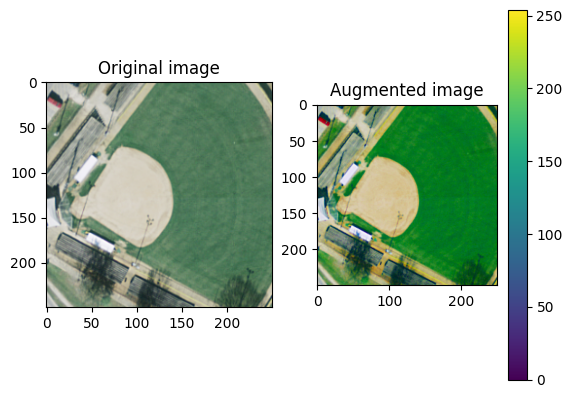

In [17]:
import os
import tensorflow as tf

count = 1

for sub_dir in os.listdir(dir):
    sub_dir_path = os.path.join(dir, sub_dir)
    original_dir_path = os.path.join(original_ds, sub_dir)

    for image_name in os.listdir(original_dir_path):
        img_path = os.path.join(sub_dir_path, image_name)
        aug_img_path = os.path.join(sub_dir_path,'saturated_' + image_name)
        original_img_path = os.path.join(original_dir_path, image_name)

        if not os.path.exists(aug_img_path):
            img_data = tf.io.read_file(original_img_path)
            img_tensor = tf.image.decode_image(img_data, channels=3)

            saturated = tf.image.adjust_saturation(img_tensor, 3)
            saturated_image_data = tf.image.encode_jpeg(saturated)
            tf.io.write_file(aug_img_path, saturated_image_data)
            # print(f'greyscaled image saved to {aug_img_path}')
        else:
            # print('greyscale Image already saved at ', sub_dir_path)
            pass

    print(count, str(sub_dir), ': saturated')
    count += 1

for image_batch, label_batch in dataset.take(1):
    saturated = tf.image.adjust_saturation(image_batch, 3)
    visualize(image_batch, saturated)

saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

### change image brightness

1 agricultural : changed brightness
2 airplane : changed brightness
3 baseballdiamond : changed brightness
4 beach : changed brightness
5 buildings : changed brightness
6 chaparral : changed brightness
7 denseresidential : changed brightness
8 forest : changed brightness
9 freeway : changed brightness
10 golfcourse : changed brightness
11 harbor : changed brightness
12 intersection : changed brightness
13 mediumresidential : changed brightness
14 mobilehomepark : changed brightness
15 overpass : changed brightness
16 parkinglot : changed brightness
17 river : changed brightness
18 runway : changed brightness
19 sparseresidential : changed brightness
20 storagetanks : changed brightness
21 tenniscourt : changed brightness


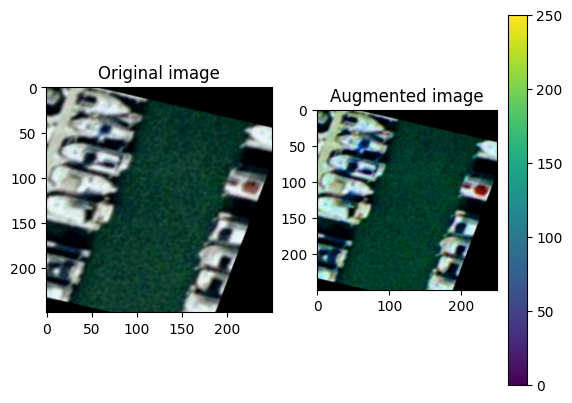

In [18]:
import os
import tensorflow as tf

count = 1

for sub_dir in os.listdir(dir):
    sub_dir_path = os.path.join(dir, sub_dir)
    original_dir_path = os.path.join(original_ds, sub_dir)

    for image_name in os.listdir(original_dir_path):
        img_path = os.path.join(sub_dir_path, image_name)
        aug_img_path = os.path.join(sub_dir_path,'brightness_' + image_name)
        original_img_path = os.path.join(original_dir_path, image_name)

        if not os.path.exists(aug_img_path):
            img_data = tf.io.read_file(original_img_path)
            img_tensor = tf.image.decode_image(img_data, channels=3)

            bright = tf.image.adjust_brightness(img_tensor, 0.4)
            bright_image_data = tf.image.encode_jpeg(bright)
            tf.io.write_file(aug_img_path, bright_image_data)
            # print(f'greyscaled image saved to {aug_img_path}')
        else:
            # print('greyscale Image already saved at ', sub_dir_path)
            pass

    print(count, str(sub_dir), ': changed brightness')
    count += 1

for image_batch, label_batch in dataset.take(1):
    saturated = tf.image.adjust_saturation(image_batch, 3)
    visualize(image_batch, saturated)

### rotation of images

1 agricultural : changed rotation
2 airplane : changed rotation
3 baseballdiamond : changed rotation
4 beach : changed rotation
5 buildings : changed rotation
6 chaparral : changed rotation
7 denseresidential : changed rotation
8 forest : changed rotation
9 freeway : changed rotation
10 golfcourse : changed rotation
11 harbor : changed rotation
12 intersection : changed rotation
13 mediumresidential : changed rotation
14 mobilehomepark : changed rotation
15 overpass : changed rotation
16 parkinglot : changed rotation
17 river : changed rotation
18 runway : changed rotation
19 sparseresidential : changed rotation
20 storagetanks : changed rotation
21 tenniscourt : changed rotation


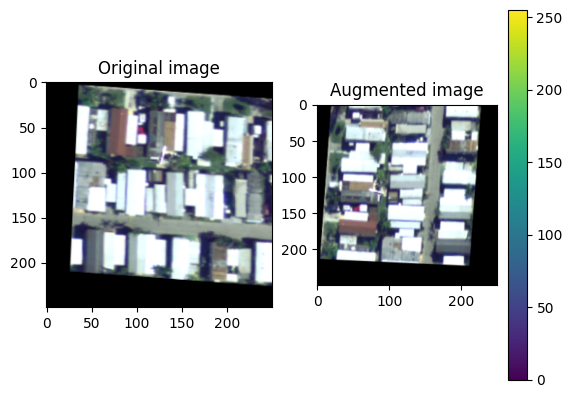

In [19]:
import os
import tensorflow as tf

count = 1

for sub_dir in os.listdir(dir):
    sub_dir_path = os.path.join(dir, sub_dir)
    original_dir_path = os.path.join(original_ds, sub_dir)

    for image_name in os.listdir(original_dir_path):
        img_path = os.path.join(sub_dir_path, image_name)
        aug_img_path = os.path.join(sub_dir_path,'rotated_' + image_name)
        original_img_path = os.path.join(original_dir_path, image_name)

        if not os.path.exists(aug_img_path):
            img_data = tf.io.read_file(original_img_path)
            img_tensor = tf.image.decode_image(img_data, channels=3)

            rotated = tf.image.rot90(img_tensor)
            rotated_image_data = tf.image.encode_jpeg(rotated)
            tf.io.write_file(aug_img_path, rotated_image_data)
            # print(f'greyscaled image saved to {aug_img_path}')
        else:
            # print('greyscale Image already saved at ', sub_dir_path)
            pass

    print(count, str(sub_dir), ': changed rotation')
    count += 1


for image_batch, label_batch in dataset.take(1):
    rotated = tf.image.rot90(image_batch)
    visualize(image_batch, rotated)

###center cropped Image

1 agricultural : changed cropped
2 airplane : changed cropped
3 baseballdiamond : changed cropped
4 beach : changed cropped
5 buildings : changed cropped
6 chaparral : changed cropped
7 denseresidential : changed cropped
8 forest : changed cropped
9 freeway : changed cropped
10 golfcourse : changed cropped
11 harbor : changed cropped
12 intersection : changed cropped
13 mediumresidential : changed cropped
14 mobilehomepark : changed cropped
15 overpass : changed cropped
16 parkinglot : changed cropped
17 river : changed cropped
18 runway : changed cropped
19 sparseresidential : changed cropped
20 storagetanks : changed cropped
21 tenniscourt : changed cropped


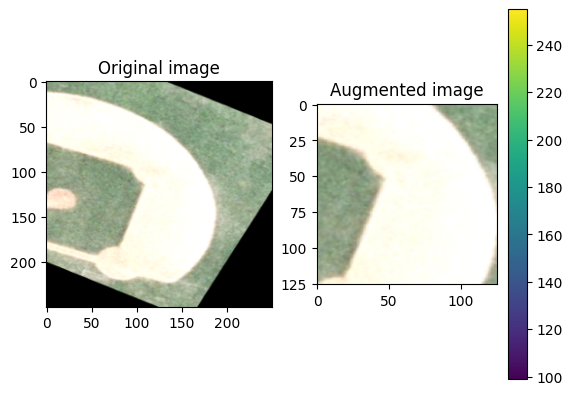

In [20]:
import os
import tensorflow as tf

count = 1

for sub_dir in os.listdir(dir):
    sub_dir_path = os.path.join(dir, sub_dir)
    original_dir_path = os.path.join(original_ds, sub_dir)

    for image_name in os.listdir(original_dir_path):
        img_path = os.path.join(sub_dir_path, image_name)
        aug_img_path = os.path.join(sub_dir_path,'cropped_' + image_name)
        original_img_path = os.path.join(original_dir_path, image_name)

        if not os.path.exists(aug_img_path):
            img_data = tf.io.read_file(original_img_path)
            img_tensor = tf.image.decode_image(img_data, channels=3)

            cropped = tf.image.central_crop(img_tensor, central_fraction=0.5)
            cropped_image_data = tf.image.encode_jpeg(cropped)
            tf.io.write_file(aug_img_path, cropped_image_data)
            # print(f'greyscaled image saved to {aug_img_path}')
        else:
            # print('greyscale Image already saved at ', sub_dir_path)
            pass

    print(count, str(sub_dir), ': changed cropped')
    count += 1


for image_batch, label_batch in dataset.take(1):
    cropped = tf.image.central_crop(image_batch, central_fraction=0.5)
    visualize(image_batch, cropped)


In [21]:
def count_images(directory):
    image_count = 0
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        if os.path.isfile(img_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_count += 1
    return image_count

for subdir in os.listdir(dir):
    path = os.path.join(dir, subdir)
    if os.path.isdir(path):
        image_count = count_images(path)
        print(f"Images in {subdir}: {image_count}")
    else:
        print(f"{subdir} is not a directory.")

Images in agricultural: 3500
Images in airplane: 3500
Images in baseballdiamond: 3500
Images in beach: 3500
Images in buildings: 3500
Images in chaparral: 3500
Images in denseresidential: 3500
Images in forest: 3500
Images in freeway: 3500
Images in golfcourse: 3500
Images in harbor: 3500
Images in intersection: 3500
Images in mediumresidential: 3500
Images in mobilehomepark: 3500
Images in overpass: 3500
Images in parkinglot: 3500
Images in river: 3500
Images in runway: 3500
Images in sparseresidential: 3500
Images in storagetanks: 3500
Images in tenniscourt: 3500


# Splitting the dataset (Train, Test, Validation)

In [23]:
print(len(dataset))

329


In [32]:

train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2)+1
test_size = int(len(dataset)*.1)+1

In [30]:
train_size


230

In [26]:
val_size

65

In [27]:
test_size

32

In [28]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

###version the model for reproducibility

In [ ]:
import datetime

currentDT = datetime.datetime.now()
print(currentDT);
model_version="splutter1"
model.save(f"/content/drive/MyDrive/models/{model_version}")

In [ ]:
scores = model.evaluate(test_data_s)

# Testing to ensure my images are of size defined. LxW, RGB=3

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(250, 250, 3)


### Ensuring img size is 250 x 250

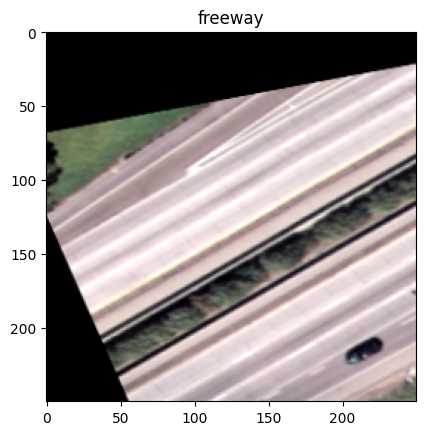

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(landuse_class_names[label_batch[0]])
    # plt.axis("off")

### viewing sample images

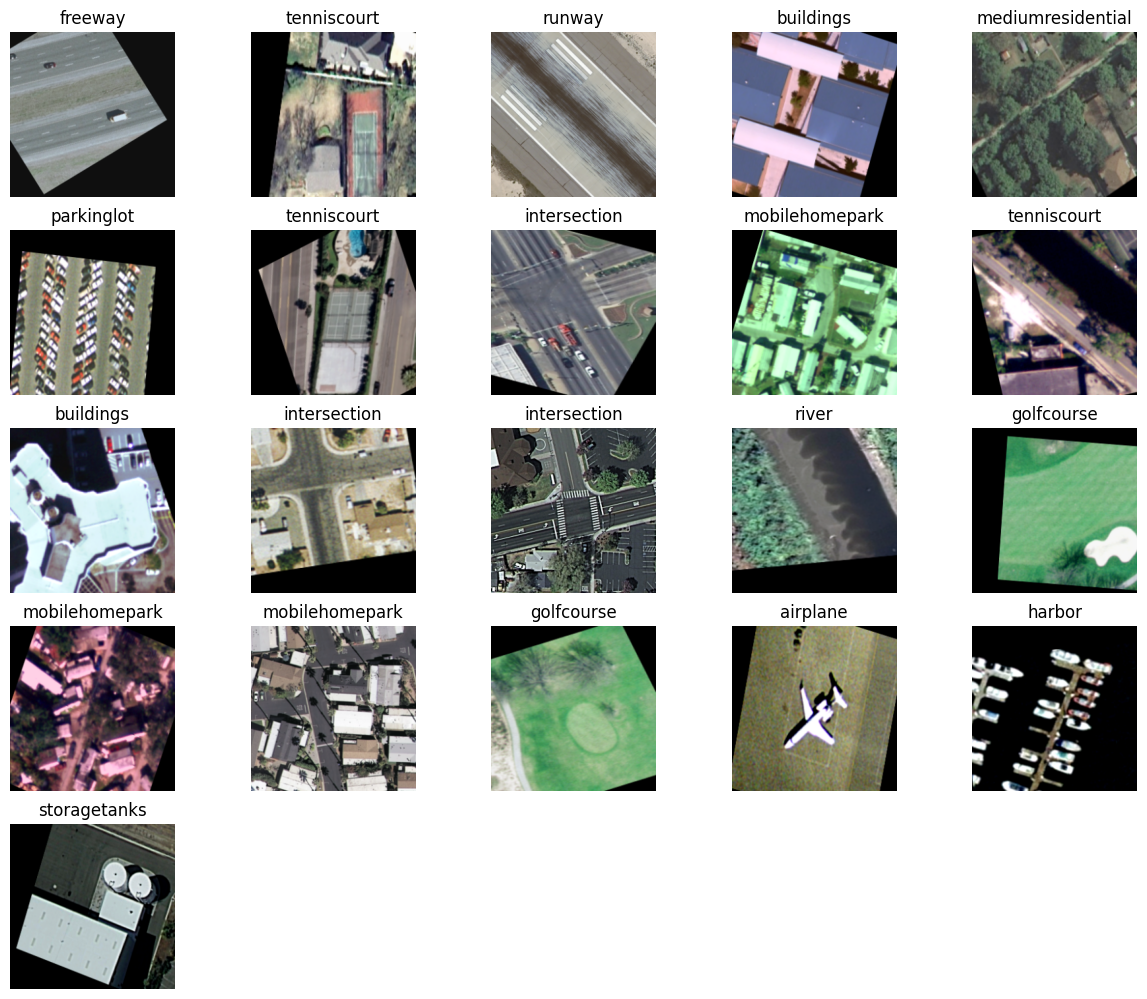

In [ ]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(21):
        ax = plt.subplot(6,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(landuse_class_names[label_batch[i]])
        plt.axis("off")

**MODEL ARCHITECTURE**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 21

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 250, 250, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 248, 248, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 124, 124, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 122, 122, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 61, 61, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (32, 238144)             

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

**TRAINING PROCESS**

In [ ]:
history = model.fit(train, epochs=10, batch_size=BATCH_SIZE, verbose=1, validation_data= val)

Epoch 1/10
230/230 [==============================] - 975s 4s/step - loss: 0.0685 - accuracy: 0.9827 - val_loss: 6.4275 - val_accuracy: 0.3010
Epoch 2/10
230/230 [==============================] - 966s 4s/step - loss: 0.0373 - accuracy: 0.9908 - val_loss: 7.0082 - val_accuracy: 0.3130
Epoch 3/10
230/230 [==============================] - 965s 4s/step - loss: 0.0179 - accuracy: 0.9959 - val_loss: 7.3336 - val_accuracy: 0.3264
Epoch 4/10
230/230 [==============================] - 968s 4s/step - loss: 0.0138 - accuracy: 0.9971 - val_loss: 7.2325 - val_accuracy: 0.3154
Epoch 5/10
230/230 [==============================] - 963s 4s/step - loss: 0.0417 - accuracy: 0.9905 - val_loss: 7.6838 - val_accuracy: 0.3183
Epoch 6/10
230/230 [==============================] - 961s 4s/step - loss: 0.0601 - accuracy: 0.9852 - val_loss: 7.3963 - val_accuracy: 0.3010
Epoch 7/10
230/230 [==============================] - 971s 4s/step - loss: 0.0459 - accuracy: 0.9876 - val_loss: 7.1863 - val_accuracy: 0.3087

**LOGGING AND VISUALIZATION**

In [ ]:
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name = run_name) as mlflow_run:

    mlflow.set_experiment_tag("base_model", "CNN")
    mlflow.set_tag("optimizer", "keras.optimizers.Adam")
    mlflow.set_tag("loss", "sparse_categorical_crossentropy")
    mlflow.set_tag("metrics", "accuracy")


    mlflow.log_param("num_epochs", EPOCHS)
    mlflow.log_param("batch_size", BATCH_SIZE)
    mlflow.log_param("input_shape", input_shape)


    mlflow.log_metric("test_accuracy", accuracy)
    mlflow.log_metric("loss_accuracy", loss)

    for i, score in enumerate(scores):
       mlflow.log_metric(f"evaluation_score_{i}", score)


    # mlflow.log_artifact("classification_report.txt")
    import mlflow
import sys
from contextlib import redirect_stdout

# Redirect stdout to capture the model summary
with mlflow.start_run():
    with open("model_summary.txt", "w") as f:
        with redirect_stdout(f):
            model_new.summary()

    # Log the model summary as an artifact
    mlflow.log_artifact("model_summary.txt")




    # mlflow_run_id = mlflow_run.info.run_id
    # print("MLFlow Run ID: ", mlflow_run_id)

**LOADING SAVED MODEL**

In [ ]:
import tensorflow as tf

# Define the path where the model is saved
save_path = '/content/drive/MyDrive/EDA/newmodel/Landuseclassmodel.h5'

# Load the model
try:
    model_new = tf.keras.models.load_model(save_path)
    print("Model loaded successfully!")
except Exception as e:
    print("Error loading the model:", e)


Model loaded successfully!


In [ ]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 238144)           

 **MODEL VERSION**

In [ ]:
import datetime

currentDT = datetime.datetime.now()
print(currentDT);
model_version="LANDUSE1"
model.save(f"/content/drive/MyDrive/EDA/models/{model_version}")


2024-03-19 16:17:40.152787


**SCORES**

In [ ]:
scores = model_new.evaluate(test)


32/32 [==============================] - 1066s 2s/step - loss: 3.0491 - accuracy: 0.0088


TESTING

In [ ]:
scores

[3.049142599105835, 0.0087890625]

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/EDA/newmodel/Landuseclassmodel.h5')

# Evaluate the model on test data
loss, accuracy = model.evaluate(test)
print("Test Accuracy:", accuracy)
print("Loss Accuracy:", loss)


32/32 [==============================] - 89s 1s/step - loss: 3.0464 - accuracy: 0.0068
Test Accuracy: 0.0068359375
Loss Accuracy: 3.046405553817749


In [ ]:
model.get_weights()

[array([[[[ 0.07239306,  0.02537853, -0.02829146, -0.12978959,
           -0.06338137,  0.13355799,  0.05943814,  0.03378309,
           -0.04130146,  0.13549085,  0.11305009, -0.11391992,
            0.02184407,  0.07403527, -0.10763492,  0.0307207 ,
           -0.05350549, -0.01902192, -0.09004775, -0.09040503,
            0.12023203,  0.07635202,  0.0074984 ,  0.05989878,
            0.01697883, -0.05758125, -0.09456622,  0.08630179,
            0.07511821,  0.08833982, -0.01058482, -0.04343864],
          [ 0.03069641, -0.01464534,  0.03904241, -0.1109234 ,
            0.07053347,  0.03874932,  0.02599043,  0.04798023,
            0.1049864 ,  0.10279386,  0.0169455 , -0.00159635,
           -0.00365077, -0.13082309,  0.04746526, -0.12027027,
            0.09113032, -0.0661822 ,  0.06990944, -0.06452323,
           -0.00025758, -0.02258266, -0.01238722, -0.12526108,
           -0.06776795, -0.03437287, -0.03039342,  0.02946751,
           -0.05816788, -0.03337451, -0.07073285, -0.0

In [ ]:
model.history.params

{'verbose': 1, 'epochs': 1, 'steps': 32}

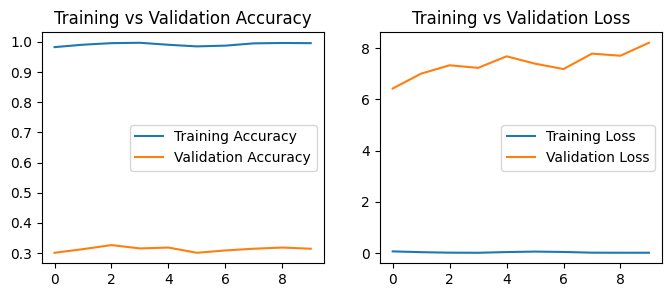

In [ ]:

epochs=10
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
import numpy as np


1/1 [==============================] - 2s 2s/step


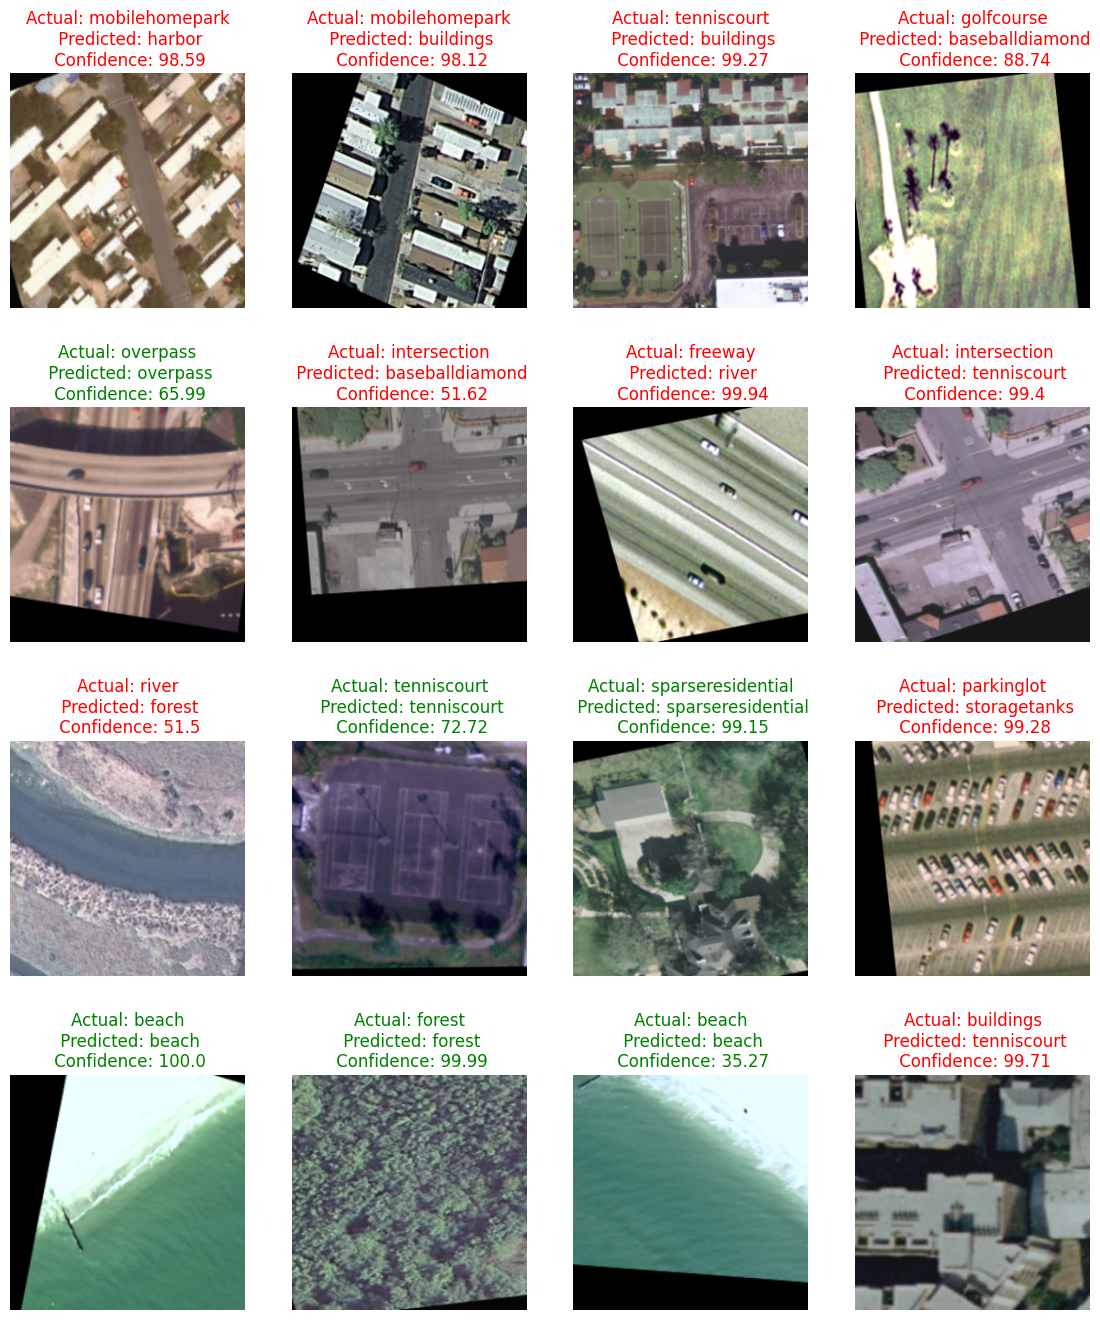

In [ ]:
for batch_image, batch_label in test.take(1):

    batch_predict_label = model.predict(batch_image)
    plt.figure(figsize=(16, 16))

    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

        img = batch_image[i].numpy().astype("uint8")
        lbl_actual = landuse_class_names[batch_label[i].numpy()]
        lbl_pred = landuse_class_names[np.argmax(batch_predict_label[i])]
        confidence = round((100 * np.max(batch_predict_label[i])), 2)

        if (lbl_pred == lbl_actual):
            plt.title(f"Actual: {lbl_actual}\n Predicted: {lbl_pred}\n Confidence: {confidence}", color='green')
        else:
            plt.title(f"Actual: {lbl_actual}\n Predicted: {lbl_pred}\n Confidence: {confidence}", color='red')
        plt.imshow(img)
        plt.axis("off")

first image to predict
actual label:  buildings
1/1 [==============================] - 1s 913ms/step
predicted label: intersection


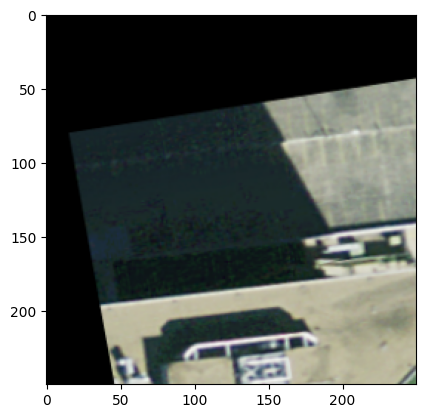

In [ ]:
for images_batch, labels_batch in test.take(1):

    first_image = images_batch[1].numpy().astype('uint8')
    first_label= labels_batch [1].numpy()

    print("first image to predict")
    plt.imshow(first_image)

    print("actual label: ",landuse_class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("predicted label:",landuse_class_names[numpy.argmax(batch_prediction[0])])

SEABON INSTALL

In [ ]:
!pip install seaborn

In [ ]:
def predict(model, img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions=model.predict(img_array)

    predicted_class= landuse_class_names[numpy.argmax(predictions[0])]
    confidence = round(100*(numpy.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 69ms/step


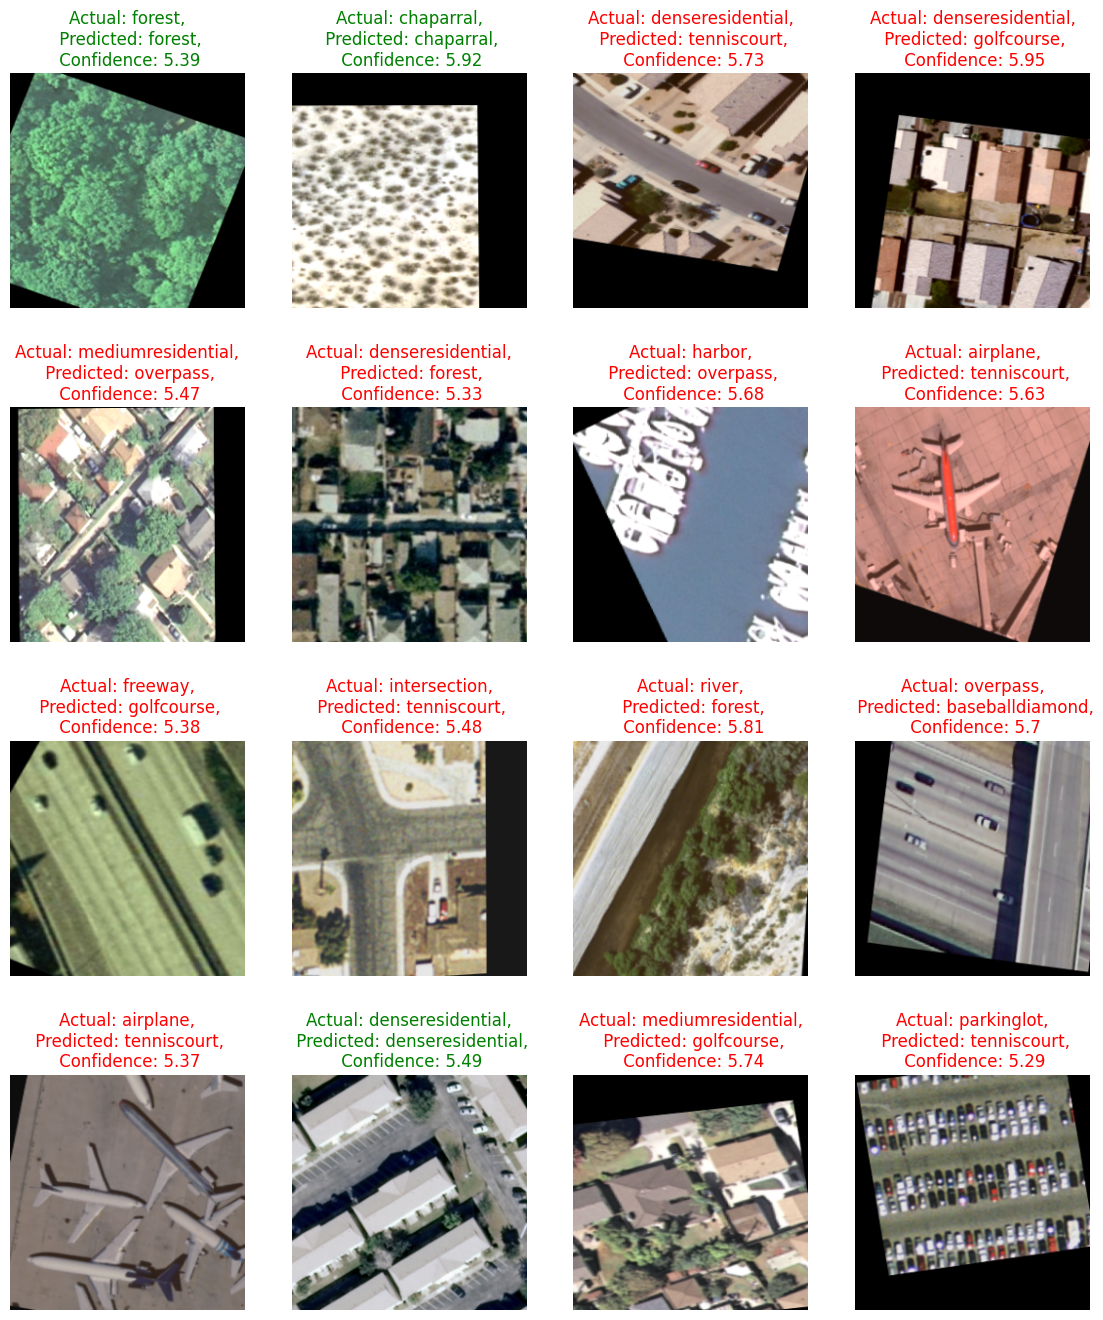

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
for images, labels in test.take(1):

    for i in range(16) :

        ax = plt.subplot(4, 4, i+1)
        plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class=landuse_class_names[labels[i]]

        if(actual_class == predicted_class):
           plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}", color='green')
        else:
           plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}", color='red')

        plt.axis("off")



1/1 [==============================] - 0s 47ms/step


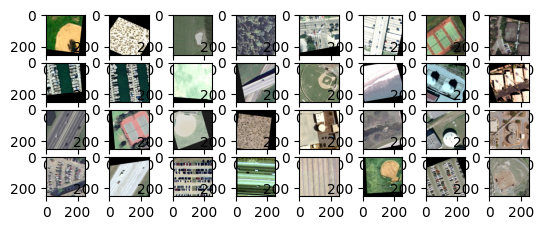

In [ ]:
y_pred = []
y_true = []
for images, labels in test:

    for i in range(len(test)):

        ax = plt.subplot(8, 8, i+1)

        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class=landuse_class_names[labels[i]]
        y_pred.append(predicted_class)
        y_true.append(actual_class)

In [ ]:
y_true

['airplane',
 'forest',
 'agricultural',
 'mobilehomepark',
 'intersection',
 'buildings',
 'baseballdiamond',
 'parkinglot',
 'overpass',
 'denseresidential',
 'mobilehomepark',
 'beach',
 'baseballdiamond',
 'river',
 'airplane',
 'chaparral',
 'intersection',
 'sparseresidential',
 'sparseresidential',
 'freeway',
 'forest',
 'forest',
 'denseresidential',
 'airplane',
 'tenniscourt',
 'harbor',
 'storagetanks',
 'golfcourse',
 'harbor',
 'sparseresidential',
 'beach',
 'denseresidential',
 'denseresidential',
 'freeway',
 'tenniscourt',
 'baseballdiamond',
 'storagetanks',
 'buildings',
 'chaparral',
 'chaparral',
 'storagetanks',
 'mobilehomepark',
 'river',
 'storagetanks',
 'agricultural',
 'harbor',
 'chaparral',
 'overpass',
 'storagetanks',
 'buildings',
 'baseballdiamond',
 'mobilehomepark',
 'storagetanks',
 'tenniscourt',
 'buildings',
 'beach',
 'airplane',
 'golfcourse',
 'chaparral',
 'mobilehomepark',
 'mediumresidential',
 'freeway',
 'mediumresidential',
 'mobilehome

In [ ]:
y_pred

['buildings',
 'golfcourse',
 'forest',
 'golfcourse',
 'denseresidential',
 'harbor',
 'buildings',
 'forest',
 'forest',
 'buildings',
 'mobilehomepark',
 'tenniscourt',
 'tenniscourt',
 'forest',
 'tenniscourt',
 'tenniscourt',
 'forest',
 'tenniscourt',
 'overpass',
 'mediumresidential',
 'tenniscourt',
 'tenniscourt',
 'baseballdiamond',
 'harbor',
 'buildings',
 'golfcourse',
 'forest',
 'forest',
 'forest',
 'forest',
 'tenniscourt',
 'tenniscourt',
 'tenniscourt',
 'tenniscourt',
 'tenniscourt',
 'harbor',
 'overpass',
 'tenniscourt',
 'forest',
 'forest',
 'golfcourse',
 'tenniscourt',
 'sparseresidential',
 'baseballdiamond',
 'golfcourse',
 'buildings',
 'golfcourse',
 'tenniscourt',
 'golfcourse',
 'tenniscourt',
 'tenniscourt',
 'forest',
 'tenniscourt',
 'golfcourse',
 'overpass',
 'golfcourse',
 'golfcourse',
 'forest',
 'overpass',
 'forest',
 'agricultural',
 'tenniscourt',
 'tenniscourt',
 'tenniscourt',
 'forest',
 'golfcourse',
 'forest',
 'golfcourse',
 'forest',
 

Text(50.72222222222221, 0.5, 'True labels')

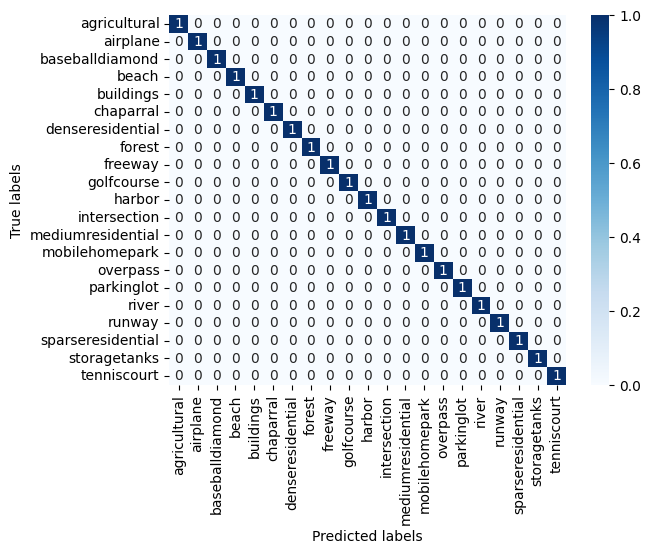

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# assume y_true and y_pred are the true labels and predicted labels, respectively
cm = confusion_matrix(y_true, y_pred)

# define class names
landuse_class_names =['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']
# create heatmap with labeled axes
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=landuse_class_names, yticklabels=landuse_class_names)

# set labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [ ]:
cm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

calculate precision and recall

In [ ]:
num_classes = 4
precision = []
recall = []
for i in range(num_classes):
    tp = cm[i, i]
    fp = sum(cm[:, i]) - tp
    fn = sum(cm[i, :]) - tp
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    precision.append(p)
    recall.append(r)

print("Precision:", precision)
print("Recall:", recall)


Precision: [1.0, 1.0, 1.0, 1.0]
Recall: [1.0, 1.0, 1.0, 1.0]


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred, average='weighted')


CLASSIFICTION REPORT

In [ ]:
from sklearn.metrics import classification_report


report = classification_report(y_true, y_pred)


print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

SAVED MODEL

In [ ]:
# from tensorflow.keras.models import load_model
# model.save(os.path.join('modelz', 'Landuseclassmodel.h5'))

import os
from tensorflow.keras.models import load_model

# Assuming 'model' is your Keras model object
save_path = '/content/drive/MyDrive/EDA/newmodel/Landuseclassmodel.h5'
model.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
